Matrix Factorization(행렬 인수분해) [Koren et al., 2009](https://d2l.ai/chapter_references/zreferences.html#koren-bell-volinsky-2009) 은 추천 시스템 문헌에서 잘 정립된 알고리즘입니다. 행렬 인수분해 모델의 첫 번째 버전은 Simon Funk가 interaction 행렬을 인수분해하는 아이디어를 설명한 유명한 [블로그 게시물](https://sifter.org/~simon/journal/20061211.html) 에서 제안되었습니다. 그러다가 2006년 넷플릭스 경진대회가 열리면서 널리 알려지게 되었습니다. 당시 미디어 스트리밍 및 비디오 대여 업체인 넷플릭스는 추천 시스템 성능 향상을 위한 경진대회를 개최하였습니다. Netflix baseline(i.e., Cinemaatch)에서 10% 이상 개선할 수 있는 최고의 팀은 100만 달러의 상금을 받게 됩니다. 이처럼 경진대회는 추천 시스템 연구 분야에서 많은 주목을 받았습니다. 그 후 대상은 BellKor의 Pragmatic Chaos 팀, BellKor, Pragmatic Theory 및 BigChaos의 통합 팀이 수상했습니다. 비록 최종 점수는 앙상블 솔루션(즉, 많은 알고리즘의 조합)의 결과였지만, 행렬 인수분해 알고리즘은 결과에 있어서 중요한 역할을 하였습니다. Netflix 수상 솔루션의 기술 보고서 [Toscher et al., 2009](https://d2l.ai/chapter_references/zreferences.html#toscher-jahrer-bell-2009) 는 채택된 모델에 대한 자세한 소개를 제공합니다. 이 섹션에서는 행렬 인수 분해 모델과 그 구현에 대해 자세히 설명합니다.

## The Matrix Factorization Model

행렬 인수분해는 협업 필터링 모델의 종류입니다. 특히, 이 모델은 사용자-아이템 간 interaction 행렬(e.g., 평점 행렬)를 두 개의 저차원 행렬의 곱으로 분해하여 사용자-아이템 interaction의 저차원 구조를 파악합니다.

> *수식이 많이 들어간 설명의 경우, 본래의 의미를 퇴색시킬 수 있어 원문을 남겨둔 채로 번역을 진행합니다.*

Let $\mathbf{R} \in \mathbb{R}^{m \times n}$ denote the
interaction matrix with $m$ users and $n$ items, and the
values of $\mathbf{R}$ represent explicit ratings. The user-item
interaction will be factorized into a user latent matrix
$\mathbf{P} \in \mathbb{R}^{m \times k}$ and an item latent matrix
$\mathbf{Q} \in \mathbb{R}^{n \times k}$, where
$k \ll m, n$, is the latent factor size. Let $\mathbf{p}_u$
denote the $u^\mathrm{th}$ row of $\mathbf{P}$ and
$\mathbf{q}_i$ denote the $i^\mathrm{th}$ row of
$\mathbf{Q}$. For a given item $i$, the elements of
$\mathbf{q}_i$ measure the extent to which the item possesses
those characteristics such as the genres and languages of a movie. For a
given user $u$, the elements of $\mathbf{p}_u$ measure the
extent of interest the user has in item's corresponding characteristics.
These latent factors might measure obvious dimensions as mentioned in
those examples or are completely uninterpretable. The predicted ratings
can be estimated by

$$ \hat{\mathbf{R}} = \mathbf{PQ}^\top$$

where $\hat{\mathbf{R}}\in \mathbb{R}^{m \times n}$ is the
predicted rating matrix which has the same shape as $\mathbf{R}$.
One major problem of this prediction rule is that users/items biases can
not be modeled. For example, some users tend to give higher ratings or
some items always get lower ratings due to poorer quality. These biases
are commonplace in real-world applications. To capture these biases,
user specific and item specific bias terms are introduced. Specifically,
the predicted rating user $u$ gives to item $i$ is
calculated by

$$ \hat{\mathbf{R}} = \mathbf{PQ}^\top$$

Then, we train the matrix factorization model by minimizing the mean
squared error between predicted rating scores and real rating scores.
The objective function is defined as follows:



$$\underset{\mathbf{P}, \mathbf{Q}, b}{\mathrm{argmin}} \sum_{(u, i) \in \mathcal{K}} \| \mathbf{R}_{ui} -
   \hat{\mathbf{R}}_{ui} \|^2 + \lambda (\| \mathbf{P} \|^2_F + \| \mathbf{Q}
   \|^2_F + b_u^2 + b_i^2 )$$

where $\lambda$ denotes the regularization rate. The regularizing
term
$\lambda (\| \mathbf{P} \|^2_F + \| \mathbf{Q} \|^2_F + b_u^2 + b_i^2 )$
is used to avoid over-fitting by penalizing the magnitude of the
parameters. The $(u, i)$ pairs for which $\mathbf{R}_{ui}$
is known are stored in the set
$\mathcal{K}=\{(u, i) \mid \mathbf{R}_{ui} \text{ is known}\}$.
The model parameters can be learned with an optimization algorithm, such
as Stochastic Gradient Descent and Adam.

$m$명의 사용자와 $n$개의 아이템이 있을 때, 사용자-아이템 interaction 행렬, $\mathbf{R} \in \mathbb{R}^{m \times n}$을 저차원 $k$ 크기를 가지는 user latent matrix $\mathbf{P} \in \mathbb{R}^{m \times k}$ 와 item latent matrix $\mathbf{Q} \in \mathbb{R}^{n \times k}$로 인수분해할 수 있습니다.

> $\mathbf{p}_u$: $\mathbf{P}$ 행렬에서 $u^\mathrm{th}$의 행, 주어진 사용자 $u$가 아이템에 나타나는 관심의 정도
>
> $\mathbf{q}_i$: $\mathbf{Q}$ 행렬에서 $i^\mathrm{th}$의 행, 주어진 아이템 $i$에 대해서 영화의 장르, 언어와 같은 아이템의 특성

이러한 latent factor(잠재 요인)은 해당 예에서 언급된 모든 차원을 측정하거나 완전히 해석할 수 없습니다.

$$ \hat{\mathbf{R}} = \mathbf{PQ}^\top$$

$\hat{\mathbf{R}}\in \mathbb{R}^{m \times n}$은 $\mathbf{R}$과 동일한 크기를 가지는 예측 평점 행렬입니다. 이러한 예측의 주요 문제점은 사용자/아이템들의 편향이 모델링되지 않았습니다. 어떤 사용자는 항상 높은 점수나 낮은 점수를 부여할 수도 있기 때문입니다. 이러한 편향은 현실 세계에서 꽤 자주 발생하게 됩니다. 이러한 편향을 위해서는 사용자와 아이템의 편향에 대한 수식이 도입되었습니다. 구체적으로, 사용자 $u$가 아이템 $i$에 부여하는 예측 등급은 다음과 같습니다.

$$\hat{\mathbf{R}}_{ui} = \mathbf{p}_u\mathbf{q}^\top_i + b_u + b_i$$

그 다음, 행렬 인수분해 모델을 예측된 평점과 실제 평점사이의 mean squared error을 최소화함으로써 훈련시킵니다. 목적함수는 아래와 같습니다.

$$\underset{\mathbf{P}, \mathbf{Q}, b}{\mathrm{argmin}} \sum_{(u, i) \in \mathcal{K}} \| \mathbf{R}_{ui} -
   \hat{\mathbf{R}}_{ui} \|^2 + \lambda (\| \mathbf{P} \|^2_F + \| \mathbf{Q}
   \|^2_F + b_u^2 + b_i^2 )$$
   
$\lambda$는 규제에 대한 강도를 조절하는 비율입니다. 규제항 $\lambda (\| \mathbf{P} \|^2_F + \| \mathbf{Q} \|^2_F + b_u^2 + b_i^2 )$은 파라미터의 크기에 패널티를 부여함으로써 오버-피팅을 방지합니다. $\mathbf{R}_{ui}$의 $(u, i)$쌍은 $\mathcal{K}=\{(u, i) \mid \mathbf{R}_{ui} \text{ is known}\}$에 저장됩니다. Gradiente Descent와 Adam과 같은 최적화 알고리즘을 통해 모델 파라미터를 학습하게 됩니다.

행렬 인수분해 모델의 직관적인 설명은 아래와 같습니다:

![image.png](https://d2l.ai/_images/rec-mf.svg)

In [1]:
import mxnet as mx
from mxnet import autograd, gluon, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()

## Model Implemention

우선, 위에 언급된대로 행렬 인수분해 모델을 실행합니다. 사용자와 아이템의 잠재 요인들은 nn.Embedding을 통해 생성됩니다. `input_dim`은 아이템/사용자의 수이며 `output_dim`은 잠재 요인(k)의 차원입니다. 또한 nn.Embedding을 사용하여 사용자/아이템의 편향을 생성하여 1차원의 크기를 가지도록 설정합니다. forward 함수에서는 사용자와 아이템의 id들은 embedding lookup으로 사용됩니다.

In [2]:
class MF(nn.Block):
    def __init__(self, num_factors, num_users, num_items, **kwargs):
        super(MF, self).__init__(**kwargs)
        self.P = nn.Embedding(input_dim=num_users, output_dim=num_factors)
        self.Q = nn.Embedding(input_dim=num_items, output_dim=num_factors)
        self.user_bias = nn.Embedding(num_users, 1)
        self.item_bias = nn.Embedding(num_items, 1)
    def forward(self, user_id, item_id):
        P_u = self.P(user_id)
        Q_i = self.Q(item_id)
        b_u = self.user_bias(user_id)
        b_i = self.item_bias(item_id)
        outputs = (P_u * Q_i).sum(axis=1) + np.squeeze(b_u) + np.squeeze(b_i)
        return outputs.flatten()

## Evaluation Measures

실제값과 모델의 예측값 사이의 차이를 측정하기 위해 일반적으로 사용되는 RMSE (root-mean-square error)를 이용하여 측정합니다. RMSE는 다음과 같이 정의되어집니다.

$$\mathrm{RMSE} = \sqrt{\frac{1}{|\mathcal{T}|}\sum_{(u, i) \in \mathcal{T}}(\mathbf{R}_{ui} -\hat{\mathbf{R}}_{ui})^2}$$

$\mathcal{T}$는 평가하려는 사용자와 아이템의 쌍으로 구성된 집합입니다. $|\mathcal{T}|$는 집합의 크기이며, mx.metric에서 제공되는 RMSE 함수를 이용합니다.

In [3]:
def evaluator(net, test_iter, devices):
    rmse = mx.metric.RMSE() # Get the RMSE
    rmse_list = []
    for idx, (users, items, ratings) in enumerate(test_iter):
        u = gluon.utils.split_and_load(users, devices, even_split=False)
        i = gluon.utils.split_and_load(items, devices, even_split=False)
        r_ui = gluon.utils.split_and_load(ratings, devices, even_split=False)
        r_hat = [net(u, i) for u, i in zip(u, i)]
        rmse.update(labels=r_ui, preds=r_hat)
        rmse_list.append(rmse.get()[1])
    return float(np.mean(np.array(rmse_list)))

## Training and Evaluating the Model

학습 함수에서는 L2 loss로 weight decay를 사용합니다. weight decay의 작동원리는 L2 규제와 동일한 효과를 나타냅니다.

In [4]:
#@save
def train_recsys_rating(net, train_iter, test_iter, loss, trainer, num_epochs,
                        devices=d2l.try_all_gpus(), evaluator=None,
                        **kwargs):
    timer = d2l.Timer()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0, 2],
                            legend=['train loss', 'test RMSE'])
    for epoch in range(num_epochs):
        metric, l = d2l.Accumulator(3), 0.
        for i, values in enumerate(train_iter):
            timer.start()
            input_data = []
            values = values if isinstance(values, list) else [values]
            for v in values:
                input_data.append(gluon.utils.split_and_load(v, devices))
            train_feat = input_data[0:-1] if len(values) > 1 else input_data
            train_label = input_data[-1]
            with autograd.record():
                preds = [net(*t) for t in zip(*train_feat)]
                ls = [loss(p, s) for p, s in zip(preds, train_label)]
            [l.backward() for l in ls]
            l += sum([l.asnumpy() for l in ls]).mean() / len(devices)
            trainer.step(values[0].shape[0])
            metric.add(l, values[0].shape[0], values[0].size)
            timer.stop()
        if len(kwargs) > 0:  # It will be used in section AutoRec
            test_rmse = evaluator(net, test_iter, kwargs['inter_mat'],
                                  devices)
        else:
            test_rmse = evaluator(net, test_iter, devices)
        train_l = l / (i + 1)
        animator.add(epoch + 1, (train_l, test_rmse))
    print(f'train loss {metric[0] / metric[1]:.3f}, 'f'test RMSE {test_rmse:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec 'f'on {str(devices)}')

마지막으로 모든 것들을 설정하고 모델을 훈련시킵니다. 여기서 잠재 인수의 차원은 30으로 설정합니다.

train loss 0.068, test RMSE 1.059
257024.8 examples/sec on [gpu(0)]


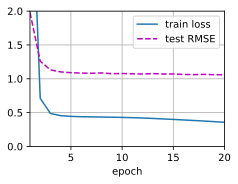

In [5]:
devices = d2l.try_all_gpus()
num_users, num_items, train_iter, test_iter = d2l.split_and_load_ml100k(
    test_ratio=0.1, batch_size=512)
net = MF(30, num_users, num_items)
net.initialize(ctx=devices, force_reinit=True, init=mx.init.Normal(0.01))
lr, num_epochs, wd, optimizer = 0.002, 20, 1e-5, 'adam'
loss = gluon.loss.L2Loss()
trainer = gluon.Trainer(net.collect_params(), optimizer,
                        {"learning_rate": lr, 'wd': wd})
train_recsys_rating(net, train_iter, test_iter, loss, trainer, num_epochs,
                    devices, evaluator)

아래에서, 훈련된 모델을 사용하여 사용자(ID 20)가 아이템(ID 30)에 대하여 예측한 평점을 확인할 수 있습니다.

In [6]:
scores = net(np.array([20], dtype='int', ctx=devices[0]),
             np.array([30], dtype='int', ctx=devices[0]))
scores

array([3.236722], ctx=gpu(0))

## Summary

- Vary the size of latent factors. How does the size of latent factors influence the model performance?

- Try different optimizers, learning rates, and weight decay rates.

- Check the predicted rating scores of other users for a specific movie.